## Inferencias acerca de de los parámetros del modelo

### Ejemplo Pruebas de Hipótesis

La limpieza del metal o aleación de aluminio fundida antes de vaciar una pieza está determinada principalmente por el contenido de hidrógeno e inclusiones del metal fundido. El artículo “Effect of Melt Cleanliness on the Properties of an A1-10 Wt Pct Si-10 Vol Pct SiC(p) Composite” (Metallurgical Trans., 1993) reporta sobre un estudio en el cual varias propiedades de tensión se relacionaron con x=fracción volumétrica de óxidos/inclusiones (%). Aquí se presentan datos sobre y=alargamiento (%) de barras de prueba. Los autores afirman que la gráfica de puntos muestra una relación lineal y dan la ecuación de la línea de mínimos cuadrados. Encuentre que variación de $y$ es explicada por el modelo y realice la prueba de utilidad de modelo a un nivel de significación $\alpha=0.05$ 

In [65]:
datos_x = [0.1, 0.16, 0.31, 0.37, 0.37, 0.46, 0.5, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9, 1, 1.07, 1.08, 1.11, 1.3, 1.37, 1.54]
datos_y = [0.96, 1.1, 0.8, 0.84, 0.77, 0.87, 0.6, 0.87, 0.6, 0.61, 0.7, 0.41, 0.4, 0.41, 0.45, 0.59, 0.25, 0.25, 0.08, 0.1]

Como primer paso en un análisis de regresión se comienza por realizar un diagrama de dispersión para identificar de manera visual si existe una relación entre las variables.

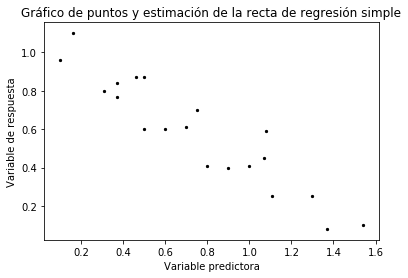

In [66]:
# Se importa librería matplotlib para realizar la gráfica de puntos
# En caso de no mostrar el gráfico, volver a correr esta celda
import matplotlib.pyplot as plt

plt.scatter(x=datos_x , y=datos_y,  marker='o', c='black', s=5)
plt.title("Gráfico de puntos y estimación de la recta de regresión simple")
plt.xlabel("Variable predictora")
plt.ylabel("Variable de respuesta")
plt.show()
plt.show()

El gráfico anterior sugiere una relación negativa entre ambas variables. Valores chicos de $x$ se encuentran pareados con valores grandes $y$, mientras que valores grandes de $x$, estan pareados con valores chicos de $y$. Utilizando código desarrollado en laboratorios anteriores se realizan los cálculos necesarios para MMC (método de mínimos cuadrados) y encontrar el valor de $\hat{\beta}_0$ y $\hat{\beta}_1$.

In [67]:
# Importamos la librería numpy para la simplificación de operaciones
import numpy as np

# Generar arrays donde se almacenan los datos contenidos en las listas datos_x y datos_ y
array_x = np.array(datos_x)
array_y = np.array(datos_y)

# Se generan las estadísticas involucradas en la estimación de la ecuación de regresión
n = len(array_x)
sum_x = sum(array_x)
sum_y = sum(array_y)
sum_xy = sum(array_x*array_y)
sum_xx = sum(array_x*array_x)
sum_yy = sum(array_y*array_y)

Con estas estadísticas computadas se pueden generar los valores de $S_{xx}$, $S_{xy}$, $\hat{\beta}_{1}$, y $\hat{\beta}_{0}$

In [68]:
# Se obtienen los valores
s_xy = sum_xy-(1/n)*sum_x*sum_y
s_xx = sum_xx-(1/n)*sum_x**2

beta_1 = s_xy / s_xx
beta_0 = (1/n)*sum_y - beta_1*(1/n)*sum_x

# Imprimir los resultados
print("La estimación de los parámetros para el modelo de regresión son: ")
print("beta1: "+str(beta_1))
print("beta0: "+str(beta_0))

La estimación de los parámetros para el modelo de regresión son: 
beta1: -0.6488372056984425
beta0: 1.0693034856709827


Estos resultados nos llevan a concluir el modelo de regresión $ y =  \hat{\beta}_{0} + \hat{\beta}_{1}*x = 1.0693 - 0.6488*x$ para los datos dados.

Este resultado es consistente con la gráfica generada anteriormente, ya que $\hat{\beta}_1$, que representa la pendiente de la recta de regresión es negativo. Ahora podemos generar un gráfico de dispersión con la linea de regresión ajustada.

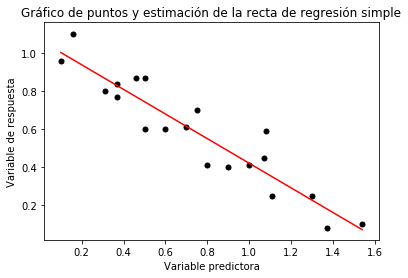

In [69]:
# Se importa librería matplotlib para realizar la gráfica de puntos
import matplotlib.pyplot as plt

plt.scatter(x=datos_x , y=datos_y,  marker='o', c='black', s=25)
plt.plot(array_x, beta_0 + beta_1 * array_x, '-', c='red')
plt.title("Gráfico de puntos y estimación de la recta de regresión simple")
plt.xlabel("Variable predictora")
plt.ylabel("Variable de respuesta")
plt.show()

### Coeficiente de determinación

¿Que proporción de la variación observada de $y$ se podría explicar con la relación del modelo? Para contestar esta pregunta utilizamos el coeficiente de determinación, que nos indica que cantidad de la varianza total en $y$, es explicada por el modelo de regresión. Recordemos la definición del coeficiente de determinación:

$$ r^2 = \frac{SSR}{SST} = \frac{SST-SSE}{SST} = 1-\frac{SSE}{SST} $$

In [70]:
# Relizamos las operaciones para calcular el coeficiente de determinación
sse = sum_yy - beta_0*sum_y - beta_1*sum_xy    #SSE Suma de cuadrados del error
sst = sum_yy - (1/n)*sum_y**2     #SST Suma total de cuadrados

coef_determ = 1-sse/sst   #Coeficiente de determianción

print("El coeficiente de determianción del modelo es: ",coef_determ)

El coeficiente de determianción del modelo es:  0.8727215179794123


El 87.3% de la variación total en $y$ es explicada por el modelo de regresión.

#### Prueba de utilidad del modelo

Para realizar la prueba de utilidad del modelo, primero se debe encontrar la desviación de beta_1. Esta cantidad esta función de la desviación sobre la recta de regresión, $s$. Por lo que hay que encontrar este valor primero.

La estimación de la varianza del error sobre la recta de regresión $(s^2)$ quedó definida como la suma de los cuadrados del error (las distancias verticales desde la línea de regresión a los puntos observados) dividida sobre los grados de libertad. La suma de cuadrados del error $(SSE)$, ya fue calculada en la celda de código anterior y guardada en la variable ```sse```.

El grado de libertad debido al error es $20-2=18$, así podemos obtener $s^2 = 0.1981/18 = 0.011$ y por lo tanto, $s=0.105$. La desviación estándar estimada de $\hat{\beta}_1$ es entonces:

$$ s_{\hat{\beta}_1} = \frac{s}{\sqrt{S_{xx}}} = \frac{0.105}{\sqrt{3.2265}} = 0.0584 $$

El siguiente código muestra como obtener este valor.

In [76]:
s_2 = sse/(n-2)                      #Obtenemos el valor s cuadrada, representada como s_2
s = s_2**(1/2)                       #Obtenemos el valor s, como la raiz cuadrada de s_2
s_beta1 = s/(s_xx**(1/2))            #La desviación del estadístico beta esta función de s

print("Desviación de beta_1: ",s_beta1)      #Imprime el valor de la desviación de beta_1

Desviación de beta_1:  0.05840353630191525


Para realizar la prueba de utilidad del modelo. El parámetro de interés es $\beta_1$, el cambio esperado del porcentaje de alargamiento asociado con 1% de incremento de la fracción volumétrica de óxidos/inclusiones. La hipótesis $H_0: \beta_1 = 0$ será rechazada frente a $H_1: \beta_1 \ne 0$ si la relación $t=\hat{\beta}_1/s_{\hat{\beta}_1}$ satisface $t\ge t_{\alpha/2,n-2} = t_{0.025,18} = 2.1009$ o $t \le -2.1009$. El siguiente código ayuda a obtener la región de rechazo.

In [78]:
# Importa librería scipy que nos permite trabajar con distribuciones de probabilidad.
# Para mas informacion -> https://docs.scipy.org/doc/scipy/reference/index.html
from scipy import stats

# Función inversa de la cdf
# Modificando el primer parametro en la funcion ppf se puede modificar el percentil al que se quiere
# relizar la prueba de hipotesis. En este caso la prueba se realiza al 95% de confiabilidad. Debido a  que la prueba es de dos
# colas se debe capturar el area de 2.5% en cada lado de la curva. Por lo tanto el parametro el 1-0.025. 
# El segundo parametro indica los grados de libertad.
valor_critico = stats.t.ppf(1-0.025, df = 18) 

print("La región de rechazo para la hpótesis nula es: t >= ", valor_critico, "y ", "t <= ", valor_critico*-1)

La región de rechazo para la hpótesis nula es: t >=  2.10092204024096 y  t <=  -2.10092204024096


Definamos esta prueba de hipótesis de manera mas estructurada:

#### Prueba de utilidad del modelo

Hipótesis nula: $H_0: \beta_1 = 0$

Hipótesis alternativa: $H_1: \beta_1 \ne 0$

Región de rechazo: t >=  2.1001 o  t <=  -2.1001

Estadístico de prueba $t = \frac{\hat{\beta}_1 - \beta_{10}}{s_{\hat{\beta}_1}} = \frac{\hat{\beta}_1}{s_{\hat{\beta}_1}} = \frac{-0.6488}{0.0584}=-11.11$

Este valor es mas chico que -2.1001, que se había definido como el valor crítico en esta prueba. Por lo tanto se rechaza la hipótesis nula y se establece que la pendiente del modelo de regresión es diferente de $cero$, lo que indica una relación positiva o negativa entre las variables predictora y de respuesta.

En lugar de comparar regiones de rechazo, podríamos calcular directamente el valor-p del estadístico de prueba. Esto nos permitiría definir si la prueba se rechaza o acepta con diferentes niveles de significanción. Esta es la manera que ha prevalecido en el curso para la prueba de hipótesis.

In [80]:
# Obtener la probabilidad acumulada a la izquierda del estadístico de prueba. 
stats.t.cdf( beta_1 / s_beta1, 18 )*2

1.7278862981529658e-09

El valor-p del estadítico de prueba es 0.00000000172788629, por lo tanto se rechaza $H_0$.